# Part 1, exploratory data analysis (EDA)
# (Или можно что-нибудь попроще)

![](https://vk.com/images/stickers/76/256.png)

Вопросы:

1. [2 балла] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - `id`, которая совершенно не информативна и будет нам только мешать, давайте сразу её уберем. Воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Какова средняя цена недвижимости? А медианная?
3. [2 балла] Сколько объектов недвижимости были обновлены и отремонтированы? Подсказка - можно проверить по переменной yr_renovated. Есть ли в датасете дома с числом спален больше 10? Сколько их?
4. [1 балл] Визуализация - Постройте гистограммы всех переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
5. [1 балл] Визуализация - Раз уж у нас есть координаты, можно их нанести на график, поставив долготу по оси y, а широту - по оси икс и тогда мы получим карту недвижимости Сиэттла :) Если перейти по вот [этой ссылке](https://www.google.ru/maps/place/47%C2%B048'00.0%22N+122%C2%B024'00.0%22W/@47.5559011,-122.3691009,10z/data=!4m5!3m4!1s0x0:0x0!8m2!3d47.8!4d-122.4) - можно будет сравнить с реальностью. А чтобы график построить - воспользуйтесь конструкцией `data.plot.scatter()` указав в качестве `x` столбец `long`, а в качестве `y` - столбец `lat`, размер графика можно задать при помощи `figsize=(12, 10)`.
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какие два фактора наиболее сильно положительно скоррелированы с ценой? Выпишите соответствующие коэффициенты корреляции у этих переменных
7. [2 балла] Группировка + Визуализация - при помощи `groupby` посчитайте  средние  значения цены для каждого возможного количества спален. Добавьте `.plot.bar()` для построения столбчатой диаграммы цены. При каком количестве комнат средняя цена недвижимости максимальна?

## Итого - 9 баллов, отлично!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, с загрузкой справились :)

In [2]:
data = pd.read_csv("../datasets/Zaharova_Alena_home_data.csv")

In [5]:
data.date = pd.to_datetime(data.date)

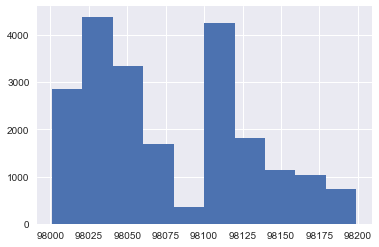

In [11]:
data.zipcode.hist()

In [2]:
import pandas as pd
data = pd.read_csv("/Users/alenazaharova/Desktop/Zaharova_Alena_home_data.csv")
print(data)

               id             date    price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000   221900         3       1.00         1180   
1      6414100192  20141209T000000   538000         3       2.25         2570   
2      5631500400  20150225T000000   180000         2       1.00          770   
3      2487200875  20141209T000000   604000         4       3.00         1960   
4      1954400510  20150218T000000   510000         3       2.00         1680   
5      7237550310  20140512T000000  1225000         4       4.50         5420   
6      1321400060  20140627T000000   257500         3       2.25         1715   
7      2008000270  20150115T000000   291850         3       1.50         1060   
8      2414600126  20150415T000000   229500         3       1.00         1780   
9      3793500160  20150312T000000   323000         3       2.50         1890   
10     1736800520  20150403T000000   662500         3       2.50         3560   
11     9212900260  20140527T

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
data[['id']].describe()

,id
count,2.161300e+04
mean,4.580302e+09
std,2.876566e+09
min,1.000102e+06
25%,2.123049e+09
50%,3.904930e+09
75%,7.308900e+09
max,9.900000e+09


### Комментарий к решению
Чтобы дропнуть столбец, нужно обязательно убедиться, что преобразование изменило исходный датасет. По умолчанию, `.drop()` не изменяем исходный датасет, чтобы изменения записались нужно либо указать еще одно ключевое слово `inplace=True`, либо просто сделать следующую конструкцию: 

In [2]:
data = data.drop('id', axis=1)

In [5]:
data.drop('id', axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Комментарий к решению
Все верно

In [6]:
data.price.mean()

540088.1419053348

In [7]:
data.price.median()

450000.0

### Комментарий к решению
Тут бы в конце еще .count() или .shape добавить, и было бы вообще круто ;)

In [8]:
data[data['yr_renovated'] > 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,9547205180,20140613T000000,696000,3,2.50,2300,3060,1.5,0,0,...,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,1483300570,20140908T000000,905000,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2450000295,20141007T000000,1088000,3,2.50,2920,8113,2.0,0,0,...,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,3626039325,20141121T000000,740500,3,3.50,4380,6350,2.0,0,0,...,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
125,4389200955,20150302T000000,1450000,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
158,8029200135,20141113T000000,247000,3,2.00,1270,7198,1.5,0,0,...,7,1270,0,1916,2013,98022,47.2086,-121.996,1160,7198
209,6300000550,20140717T000000,464000,6,3.00,2300,3404,2.0,0,0,...,7,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312
216,46100204,20150221T000000,1505000,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
230,8096000060,20150413T000000,655000,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193


In [9]:
data[data['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [10]:
data[data['yr_renovated'] > 0][data['bedrooms'] > 10]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


### Комментарий к решению
Все верно, а чтобы питон не печатал кучу matplotlib.axes._subplots... достаточно в конце строчки  поставить точку с запятой ;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c02b630>,
      dtype=object)

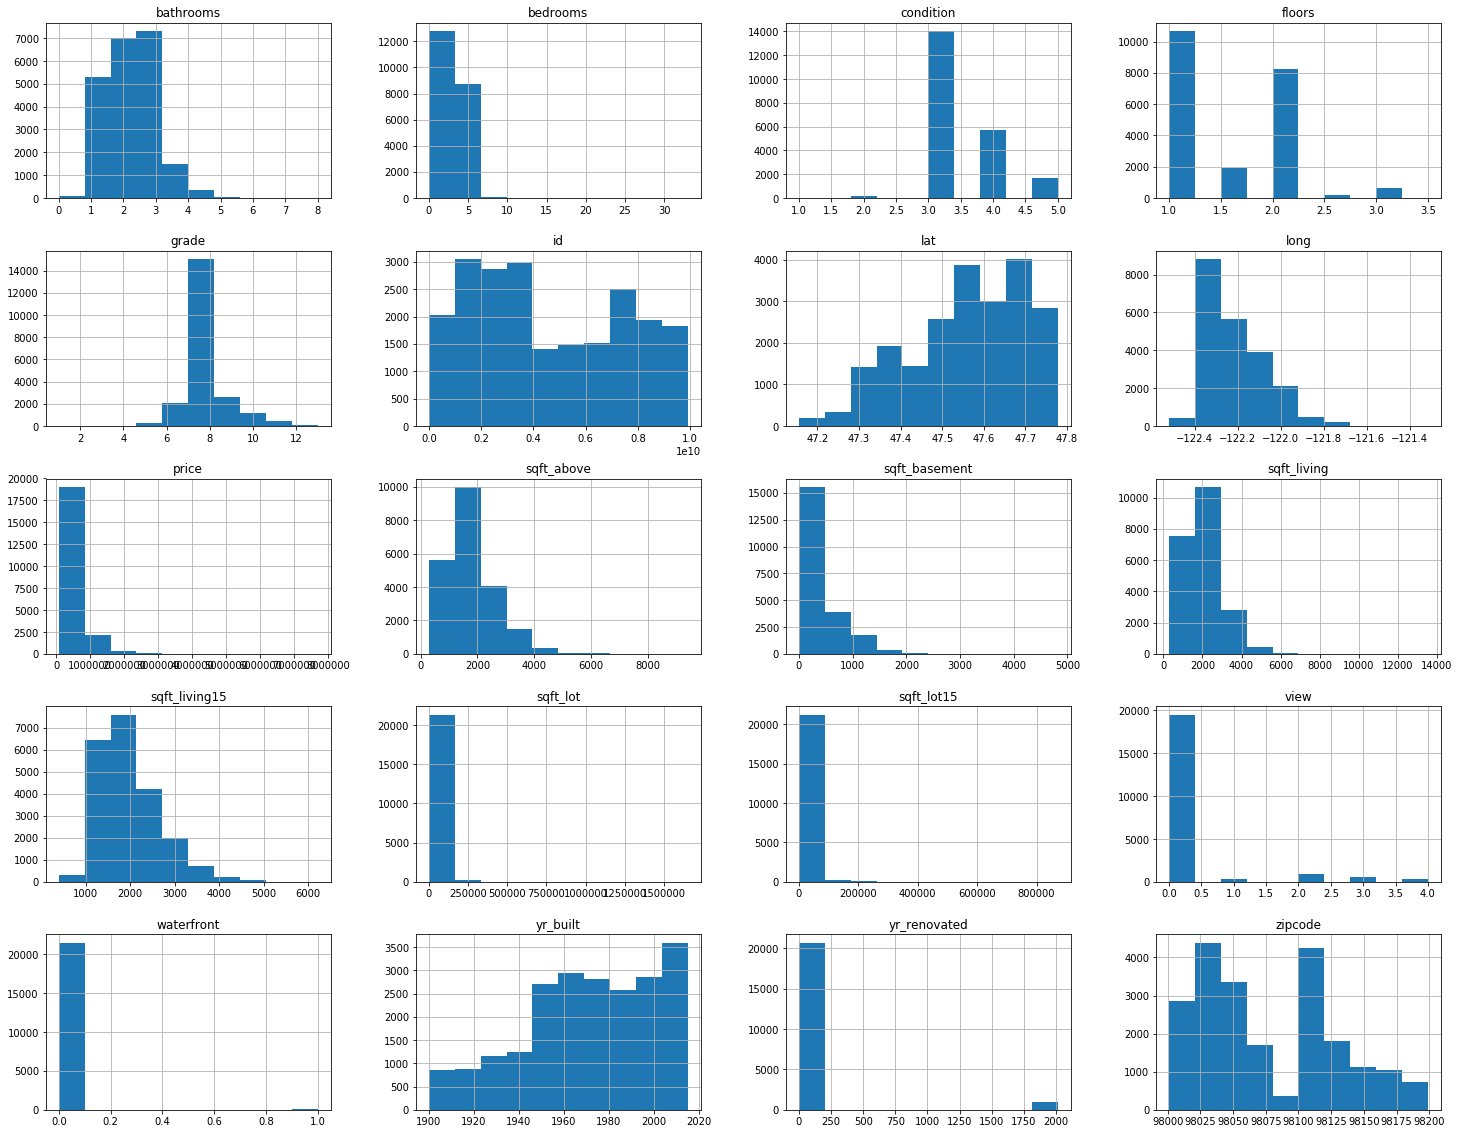

In [11]:
data.hist(figsize=(25, 20))

### Комментарий к решению
Красиво получилось :)

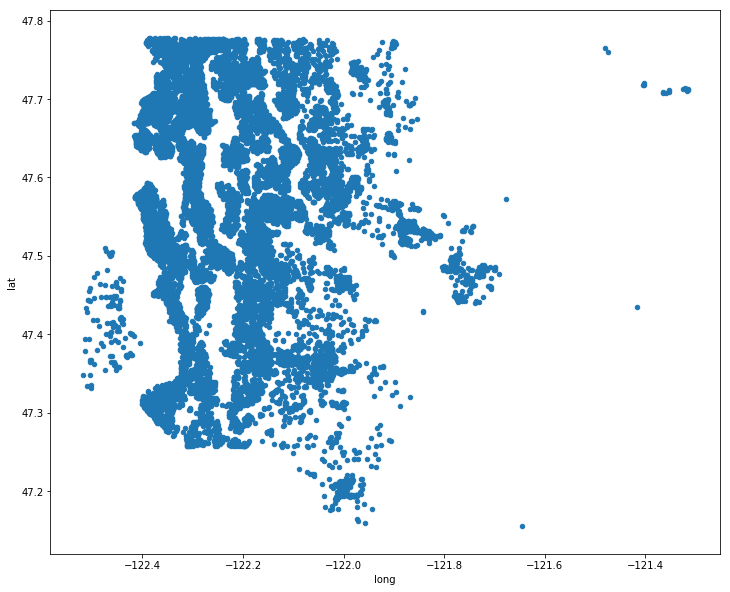

In [12]:
data.plot.scatter(x = 'long', y = 'lat', figsize=(12, 10))

### Комментарий к решению
Всё верно :)

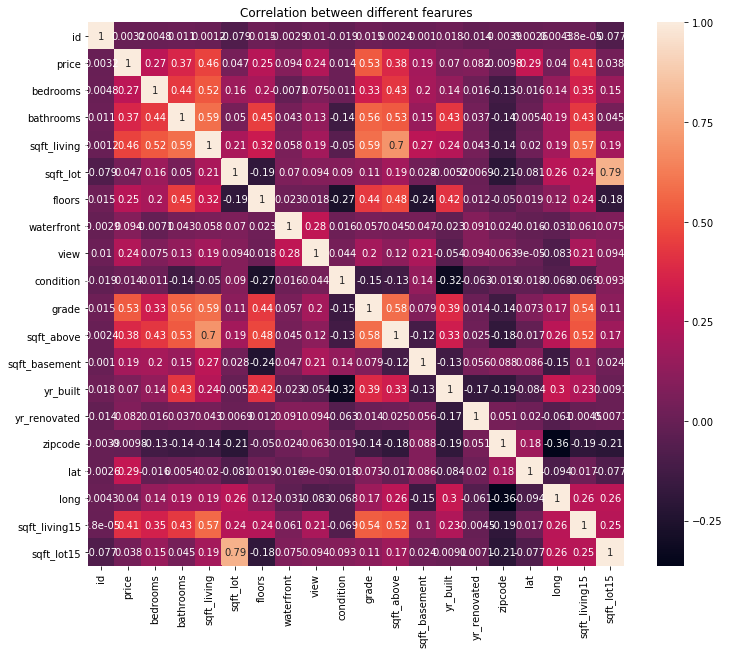

Корреляция переменной price с пременной grade составляет 0,53, а с переменной sqft-living - 0,46. Можно сделать вывод, что цена значительно зависит от общей площади и класса дома


In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr('kendall'), annot=True);
plt.title('Correlation between different fearures')
plt.show()

print('Корреляция переменной price с пременной grade составляет 0,53, а с переменной sqft-living - 0,46. Можно сделать вывод, что цена значительно зависит от общей площади и класса дома')

### Комментарий к решению
Супер, миленькая визуализация вышла

In [14]:
data.groupby('bedrooms').price.mean()

bedrooms
0     4.095037e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

Средняя цена недвижимости максимальна при 8 комнатах.


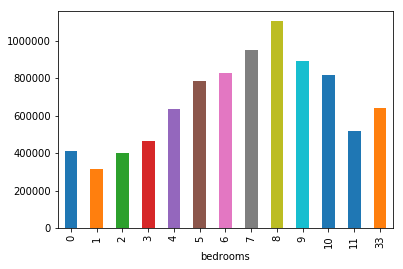

In [15]:
data.groupby('bedrooms').price.mean().plot.bar()
print("Средняя цена недвижимости максимальна при 8 комнатах.")